In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D,  MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import models
import os

drive_dir = "/content/drive"

In [ ]:
training_path = "MyDrive/Fruits_Classification/fruit_dataset/training_set"
training_set = os.path.join(drive_dir, training_path)
for i in os.listdir(training_set):
  classes = os.path.join(training_set, i)
  print(classes)

In [7]:
model = Sequential()

#Conv Layer 1
model.add(Conv2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Conv Layer 2
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

#Conv Layer 3
model.add(Conv2D(32,(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(1,1)))

#Flattening from 2D to 1D
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))

#Output layer
model.add(Dense(3,activation='softmax'))

#Model summary
model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy",
              metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True)

train_model = train_datagen.flow_from_directory(
    training_set,
    target_size=(64, 64),
    batch_size=16,
    class_mode="categorical"
)

print(f"Lenght of Train Model={len(train_model)}")

model.fit(train_model, steps_per_epoch=len(train_model), epochs=50)

model_path = f"{drive_dir}/MyDrive/Fruits_Classification"
model.save(f"{model_path}/fruitClassifier.h5")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        1056      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)      

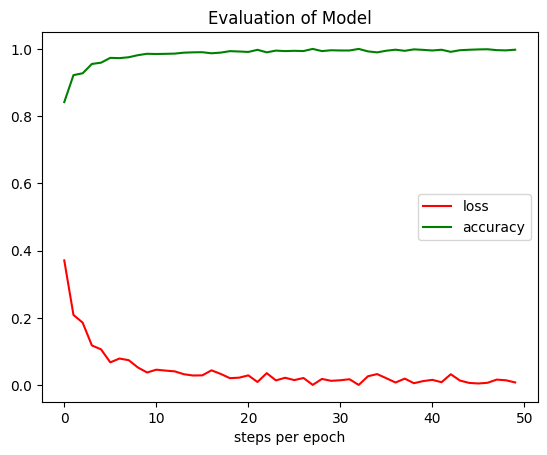

In [14]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'], label='loss', color='red')
plt.plot(model.history.history['accuracy'], label='accuracy', color='green')

plt.title('Evaluation of Model')
plt.xlabel('steps per epoch')

plt.legend()
plt.show()